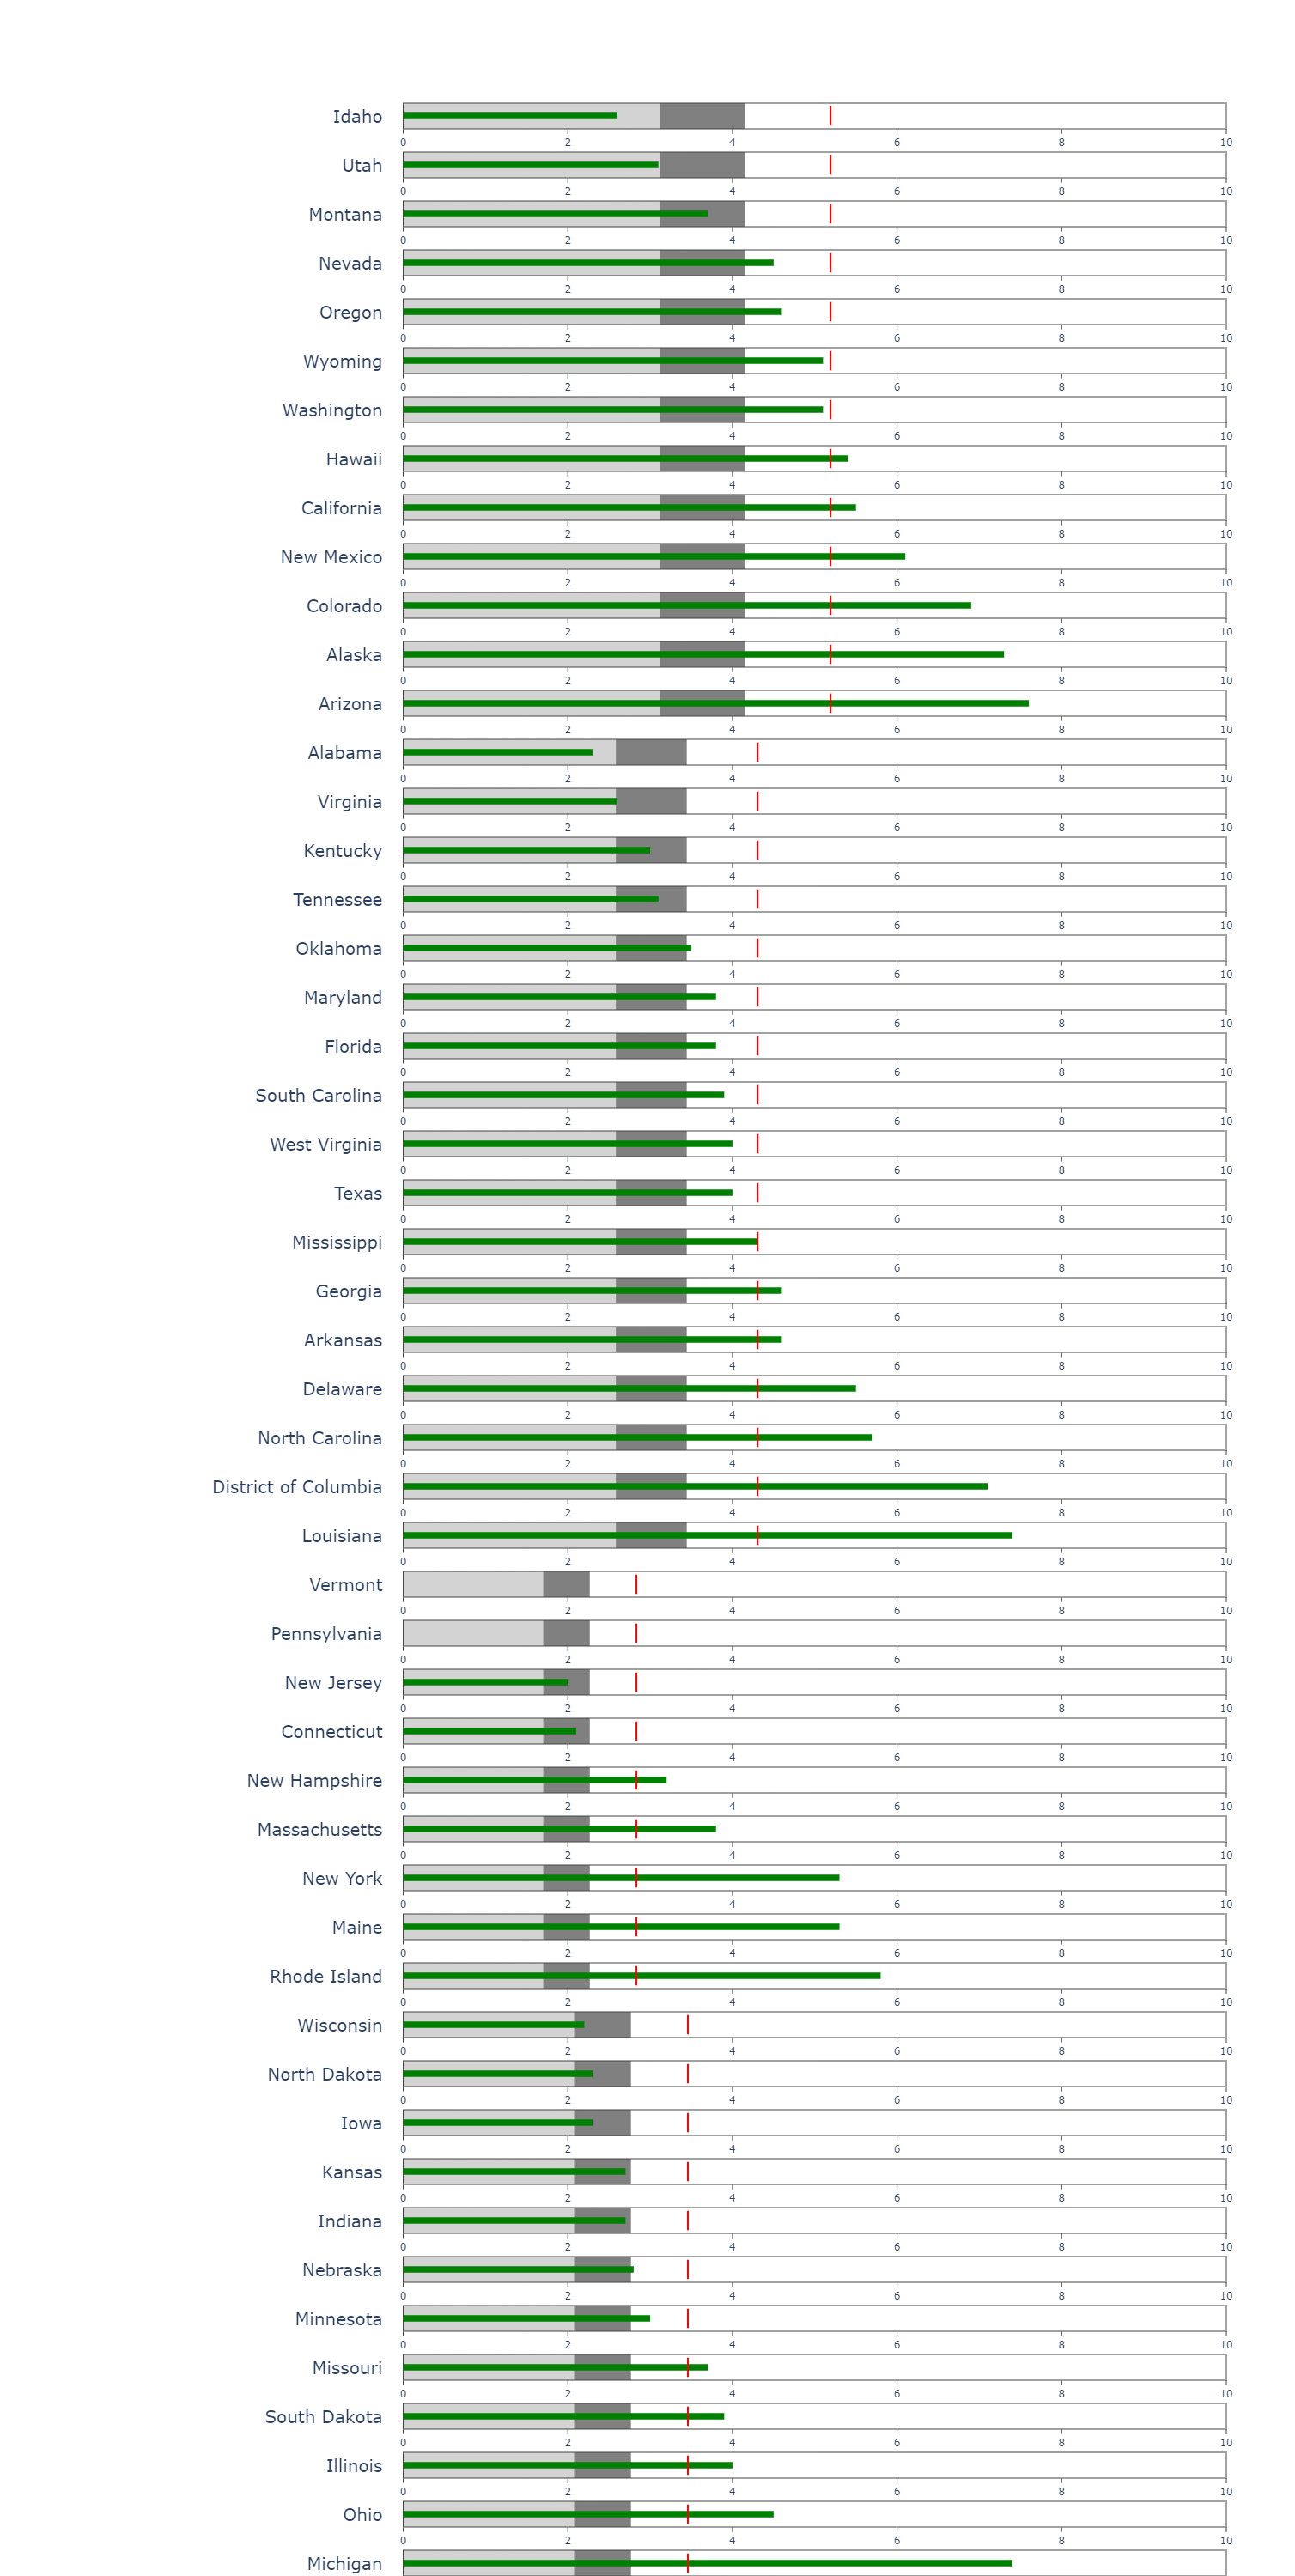

In [129]:
import plotly.graph_objects as go
import pandas as pd

# Import data to dataframe
df = pd.read_csv(r'C:\Users\jeric\OneDrive/Documents/classFiles/DSC640/Exercises/Week10_11/education.csv', index_col=False)

# Adding Regional Average
df['newname'] = df["Region"]+"-"+df["state"]
df['Region_avg'] = df.groupby(["Region"])['dropout_rate'].transform('mean')
df['Region_avg_diff'] = df['Region_avg']-df['dropout_rate']
df = df.sort_values(by=["Region",'Region_avg_diff'], ascending=True)

a = 0


fig = go.Figure()
for index, row in df.iterrows():
    fig.add_trace(go.Indicator(
        mode = "gauge",value =row[6],
        domain = {'x':[0.25,1], 'y':[a, a+0.010]},
        title = {'text' : row[0]},
        gauge = {
            'shape': "bullet",
            'axis': {'range': [None, 10]},

            'threshold': {
                'line': {'color': "red", 'width': 2},
                'thickness': 0.75,
                'value': row[9]},
            'steps': [
                {'range': [0, row[9]*0.6], 'color': "lightgray"},
                {'range': [row[9]*0.6,row[9]*0.8], 'color': "gray"}]}))
    a= a+0.019
fig.update_layout(autosize=False,height = 3000, width=800, margin={'t':0, 'b':0, 'l':150})
fig.show()